# **Explroatory analysis of Single cell data**

started: 05/03/2025 author: Agathe Sobkowicz

Data collected from https://cellxgene.cziscience.com/collections/3f7c572c-cd73-4b51-a313-207c7f20f188

This atlas is an integration of 13 single-cell studies of cells obtained from 8 tumor types and normal tissues, including breast, colorectal, ovary, lung, liver, skin, uvea and PBMC. Four types of samples compose this dataset (normal, tumor, lymph node, and blood) obtained from 3 different types of single-cell technologies (10x, Smart-seq2, and inDrop).

The downloaded has already been preprocessed: filtered and normalised.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import scanpy as sc
import numpy as np
import pandas as pd

import data_analysis_functions

In [2]:
adata_ref = sc.read_h5ad("/home/agathes/work/Sc_data/Sc_cellxgene.h5ad")

In [3]:
# Convert downloaded preprocessed data back to raw data saving normalised values
# adata_ref.layers["normalized"] = adata_ref.X.copy()
adata_ref.X = adata_ref.raw.X

In [4]:
adata_ref

AnnData object with n_obs × n_vars = 391963 × 45454
    obs: 'nCount_RNA', 'nFeature_RNA', 'harm_study', 'harm_healthy.tissue', 'harm_tumor.site', 'harm_sample.type', 'harm_condition', 'harm_tumor.type', 'harm_cd45pos', 'harm_healthy.pat', 'percent.mt', 'ratio_nCount_nFeature', 'batch', 'X_scvi_batch', 'X_scvi_labels', 'X_scvi_local_l_mean', 'X_scvi_local_l_var', 'leiden_0.2', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1', 'leiden_1.2', 'leiden_1.4', 'author_first_cell_type', 'author_cell_type', 'cnv_score', 'organism_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'assay_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feat

In [5]:
adata_ref.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ensembl_id,,,,,,
ENSG00000000003,False,TSPAN6,NCBITaxon:9606,gene,2396,protein_coding
ENSG00000000005,False,TNMD,NCBITaxon:9606,gene,873,protein_coding
ENSG00000000419,False,DPM1,NCBITaxon:9606,gene,1262,protein_coding
ENSG00000000457,False,SCYL3,NCBITaxon:9606,gene,2916,protein_coding
ENSG00000000460,False,C1orf112,NCBITaxon:9606,gene,2661,protein_coding
...,...,...,...,...,...,...
ENSG00000288596,False,C8orf44,NCBITaxon:9606,gene,732,lncRNA
ENSG00000288602,False,C8orf44-SGK3,NCBITaxon:9606,gene,1788,protein_coding
ENSG00000288603,False,SNORA74C-2,NCBITaxon:9606,gene,201,snoRNA


In [6]:
adata_ref.obs

,nCount_RNA,nFeature_RNA,harm_study,harm_healthy.tissue,harm_tumor.site,harm_sample.type,harm_condition,harm_tumor.type,harm_cd45pos,harm_healthy.pat,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
BT1299_GTACTCCTCGGAAACG-1-17,8724,2676,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,tissue,endothelial cell,10x 3' v2,lung cancer,Homo sapiens,male,lung,unknown,seventh decade stage,VQ)lMX+9e2
BT1299_GTACTTTAGCAGGCTA-1-17,2650,1022,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,tissue,mononuclear phagocyte,10x 3' v2,lung cancer,Homo sapiens,male,lung,unknown,seventh decade stage,*C(!*!?gbg
BT1299_GTACTTTAGCATGGCA-1-17,3725,1574,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,tissue,endothelial cell,10x 3' v2,lung cancer,Homo sapiens,male,lung,unknown,seventh decade stage,0Yi2m7iJFf
BT1299_GTACTTTAGGATGTAT-1-17,1436,701,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,tissue,B cell,10x 3' v2,lung cancer,Homo sapiens,male,lung,unknown,seventh decade stage,P;RzB7(bPD
BT1299_GTACTTTAGGCTCTTA-1-17,19715,4427,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,tissue,malignant cell,10x 3' v2,lung cancer,Homo sapiens,male,lung,unknown,seventh decade stage,ucf$;<UYzu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P3_6_GTGCAGCTCATGTCCC-1-3,10662,2905,HLCA,yes,normal,normal,lung_N,lung,mixed,no,...,tissue,epithelial cell,10x 3' v2,normal,Homo sapiens,female,lung,unknown,51-year-old stage,;1iy^qzS4a
P3_6_GTTCGGGTCGGATGGA-1-3,4301,1823,HLCA,yes,normal,normal,lung_N,lung,mixed,no,...,tissue,epithelial cell,10x 3' v2,normal,Homo sapiens,female,lung,unknown,51-year-old stage,es>~!lzqQs
P3_6_TAAGCGTTCAATCACG-1-3,4656,1852,HLCA,yes,normal,normal,lung_N,lung,mixed,no,...,tissue,epithelial cell,10x 3' v2,normal,Homo sapiens,female,lung,unknown,51-year-old stage,X&8axAv1xx
P3_6_TACTTACGTTGATTGC-1-3,5928,2009,HLCA,yes,normal,normal,lung_N,lung,mixed,no,...,tissue,epithelial cell,10x 3' v2,normal,Homo sapiens,female,lung,unknown,51-year-old stage,CQuxrS|j*6


In [7]:
adata_ref.obs['tissue'].value_counts()

tissue
lung              161242
breast             67199
ovary              66317
uvea               51712
colorectum         18837
skin epidermis     17532
liver               6661
blood               2463
Name: count, dtype: int64

In [8]:
# Keep only lung tissue
adata_ref = adata_ref[(adata_ref.obs['tissue']=="lung")].copy()
adata_ref = adata_ref[(adata_ref.obs["harm_sample.type"] != "blood")].copy()
adata_ref.obs['sample_cell_type'] = adata_ref.obs['harm_sample.type'].astype(str) + '-' + adata_ref.obs['cell_type'].astype(str)

In [9]:
# Genes/var tare already names by ENSEBL ID, which is necessary for matching between single cell and spatial data
adata_ref.var.index.name = "gene_ids_2" # Capitalise the name of var names column

In [10]:
adata_ref.obs["nCount_RNA"].describe()

count    1.450720e+05
mean     4.997328e+04
std      2.655811e+05
min      2.540000e+02
25%      1.181000e+03
50%      2.286000e+03
75%      4.872250e+03
max      6.037533e+06
Name: nCount_RNA, dtype: float64

Text(0, 0.5, 'Number of features/genes per observation')

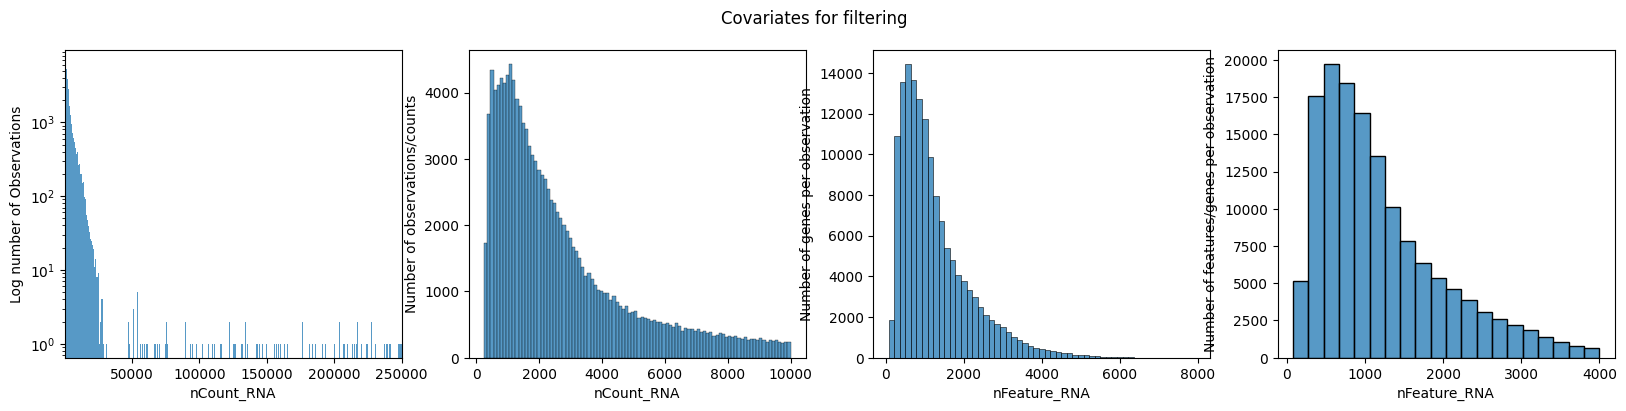

In [11]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
fig.suptitle("Covariates for filtering")

sb.histplot(
    adata_ref.obs["nCount_RNA"],
    kde=False,
    ax=axs[0],
)  # Number of obs/spot with given amount of counts
axs[0].set_xlim(1, 250000)
axs[0].set_yscale("log")
axs[0].set_ylabel("Log number of Observations")  # Change y-axis label

sb.histplot(
    adata_ref.obs["nCount_RNA"][adata_ref.obs["nCount_RNA"] < 10000],
    kde=False,
    ax=axs[1],
)
axs[1].set_ylabel("Number of observations/counts")  # Change y-axis label

sb.histplot(
    adata_ref.obs["nFeature_RNA"], kde=False, bins=55, ax=axs[2]
)  # Number of obs/spot with given amount of unique genes per spot/obs
axs[2].set_ylabel("Number of genes per observation")  # Change y-axis label

sb.histplot(
    adata_ref.obs["nFeature_RNA"][adata_ref.obs["nFeature_RNA"] < 4000],
    kde=False,
    bins=20,
    ax=axs[3],
)
axs[3].set_ylabel("Number of features/genes per observation")  # Change y-axis label

In [12]:
# mitochondrial genes
adata_ref.var["mt"] = adata_ref.var['feature_name'].str.startswith("MT-")
# ribosomal genes
adata_ref.var["ribo"] = adata_ref.var['feature_name'].str.startswith(("RPS", "RPL"))

In [13]:
sc.pp.calculate_qc_metrics(
    adata_ref, qc_vars=["mt", "ribo"], inplace=True, percent_top=[20], log1p=True
)
adata_ref

AnnData object with n_obs × n_vars = 145072 × 45454
    obs: 'nCount_RNA', 'nFeature_RNA', 'harm_study', 'harm_healthy.tissue', 'harm_tumor.site', 'harm_sample.type', 'harm_condition', 'harm_tumor.type', 'harm_cd45pos', 'harm_healthy.pat', 'percent.mt', 'ratio_nCount_nFeature', 'batch', 'X_scvi_batch', 'X_scvi_labels', 'X_scvi_local_l_mean', 'X_scvi_local_l_var', 'leiden_0.2', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1', 'leiden_1.2', 'leiden_1.4', 'author_first_cell_type', 'author_cell_type', 'cnv_score', 'organism_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'assay_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'sample_cell_type', 'n_genes_by_coun

In [14]:
adata_ref.obs

,nCount_RNA,nFeature_RNA,harm_study,harm_healthy.tissue,harm_tumor.site,harm_sample.type,harm_condition,harm_tumor.type,harm_cd45pos,harm_healthy.pat,...,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo
BT1299_GTACTCCTCGGAAACG-1-17,8724,2676,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,7.892452,8724.0,9.073948,16.162311,298.0,5.700444,3.415864,1491.0,7.307873,17.090784
BT1299_GTACTTTAGCAGGCTA-1-17,2650,1022,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,6.930495,2650.0,7.882692,26.905660,93.0,4.543295,3.509434,374.0,5.926926,14.113207
BT1299_GTACTTTAGCATGGCA-1-17,3725,1574,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,7.362011,3725.0,8.223090,20.053691,141.0,4.955827,3.785235,523.0,6.261492,14.040269
BT1299_GTACTTTAGGATGTAT-1-17,1436,701,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,6.553933,1436.0,7.270313,23.259053,55.0,4.025352,3.830083,320.0,5.771441,22.284122
BT1299_GTACTTTAGGCTCTTA-1-17,19715,4427,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,8.395703,19715.0,9.889186,16.500127,1333.0,7.195937,6.761349,2988.0,8.002694,15.155972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P3_6_GTGCAGCTCATGTCCC-1-3,10662,2905,HLCA,yes,normal,normal,lung_N,lung,mixed,no,...,6.340359,222495.0,12.312664,30.286973,0.0,0.000000,0.000000,47445.0,10.767347,21.324074
P3_6_GTTCGGGTCGGATGGA-1-3,4301,1823,HLCA,yes,normal,normal,lung_N,lung,mixed,no,...,6.030685,98243.0,11.495210,52.837352,0.0,0.000000,0.000000,13581.0,9.516500,13.823886
P3_6_TAAGCGTTCAATCACG-1-3,4656,1852,HLCA,yes,normal,normal,lung_N,lung,mixed,no,...,7.947679,1509145.0,14.227055,28.410789,0.0,0.000000,0.000000,64732.0,11.078027,4.289316
P3_6_TACTTACGTTGATTGC-1-3,5928,2009,HLCA,yes,normal,normal,lung_N,lung,mixed,no,...,8.142645,1678229.0,14.333250,31.425985,0.0,0.000000,0.000000,19102.0,9.857600,1.138224


In [15]:
adata_ref.obs.keys()

Index(['nCount_RNA', 'nFeature_RNA', 'harm_study', 'harm_healthy.tissue',
       'harm_tumor.site', 'harm_sample.type', 'harm_condition',
       'harm_tumor.type', 'harm_cd45pos', 'harm_healthy.pat', 'percent.mt',
       'ratio_nCount_nFeature', 'batch', 'X_scvi_batch', 'X_scvi_labels',
       'X_scvi_local_l_mean', 'X_scvi_local_l_var', 'leiden_0.2', 'leiden_0.4',
       'leiden_0.6', 'leiden_0.8', 'leiden_1', 'leiden_1.2', 'leiden_1.4',
       'author_first_cell_type', 'author_cell_type', 'cnv_score',
       'organism_ontology_term_id', 'donor_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id',
       'tissue_ontology_term_id', 'cell_type_ontology_term_id',
       'suspension_type', 'assay_ontology_term_id', 'is_primary_data',
       'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_j

In [16]:
adata_ref.obs['harm_tumor.site']

BT1299_GTACTCCTCGGAAACG-1-17    primary
BT1299_GTACTTTAGCAGGCTA-1-17    primary
BT1299_GTACTTTAGCATGGCA-1-17    primary
BT1299_GTACTTTAGGATGTAT-1-17    primary
BT1299_GTACTTTAGGCTCTTA-1-17    primary
                                 ...   
P3_6_GTGCAGCTCATGTCCC-1-3        normal
P3_6_GTTCGGGTCGGATGGA-1-3        normal
P3_6_TAAGCGTTCAATCACG-1-3        normal
P3_6_TACTTACGTTGATTGC-1-3        normal
P3_6_TAGGCATAGCTCCCAG-1-3        normal
Name: harm_tumor.site, Length: 145072, dtype: category
Categories (3, object): ['metastasis', 'normal', 'primary']

In [17]:
adata_ref.obs["cell_type"].value_counts()

cell_type
T cell                         46683
mononuclear phagocyte          27607
endothelial cell               20267
epithelial cell                15566
B cell                          9837
malignant cell                  9595
fibroblast                      8775
mast cell                       3369
neutrophil                      2816
plasmacytoid dendritic cell      553
megakaryocyte                      4
Name: count, dtype: int64

In [18]:
adata_ref.obs["harm_sample.type"].value_counts()

harm_sample.type
tumor     73872
normal    71200
Name: count, dtype: int64

In [19]:
selected_sample_cell_type = adata_ref.obs['sample_cell_type'].value_counts()[adata_ref.obs['sample_cell_type'].value_counts() > 500].index.tolist()

In [20]:
adata_ref = adata_ref[adata_ref.obs['sample_cell_type'].isin(selected_sample_cell_type), :].copy()

In [21]:
pd.crosstab(adata_ref.obs["cell_type"], adata_ref.obs["harm_sample.type"])

harm_sample.type,normal,tumor
cell_type,,
fibroblast,6533,2242
epithelial cell,12628,2938
T cell,16201,30482
mast cell,2004,1365
mononuclear phagocyte,14243,13364
endothelial cell,18731,1536
B cell,622,9215
neutrophil,0,2733
malignant cell,0,9595


In [22]:
adata_ref.obs['sample_cell_type'].unique()

array(['tumor-endothelial cell', 'tumor-mononuclear phagocyte',
       'tumor-B cell', 'tumor-malignant cell', 'tumor-epithelial cell',
       'tumor-T cell', 'tumor-mast cell', 'tumor-fibroblast',
       'tumor-neutrophil', 'normal-epithelial cell',
       'normal-endothelial cell', 'normal-fibroblast',
       'normal-mononuclear phagocyte', 'normal-mast cell',
       'normal-T cell', 'normal-B cell'], dtype=object)

In [23]:
sc.pp.normalize_total(adata_ref, target_sum=1e4)
sc.pp.log1p(adata_ref)
sc.pp.highly_variable_genes(adata_ref, flavor='seurat', n_top_genes=2000)
adata_ref = adata_ref[:, adata_ref.var['highly_variable']]

sc.tl.pca(adata_ref, svd_solver='arpack')
sc.pp.neighbors(adata_ref, n_neighbors=10, use_rep='X_pca')
sc.tl.leiden(adata_ref, resolution=0.5)

/home/agathes/py_env/lib/python3.12/site-packages/scanpy/preprocessing/_pca/__init__.py:379: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/home/agathes/py_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_209568/2587356111.py:8: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_ref, resolution=0.5)


/home/agathes/py_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:459: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/agathes/py_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/agathes/py_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:459: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/agathes/py_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/agathes/py_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:459: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/agathes/py_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:461: Runt

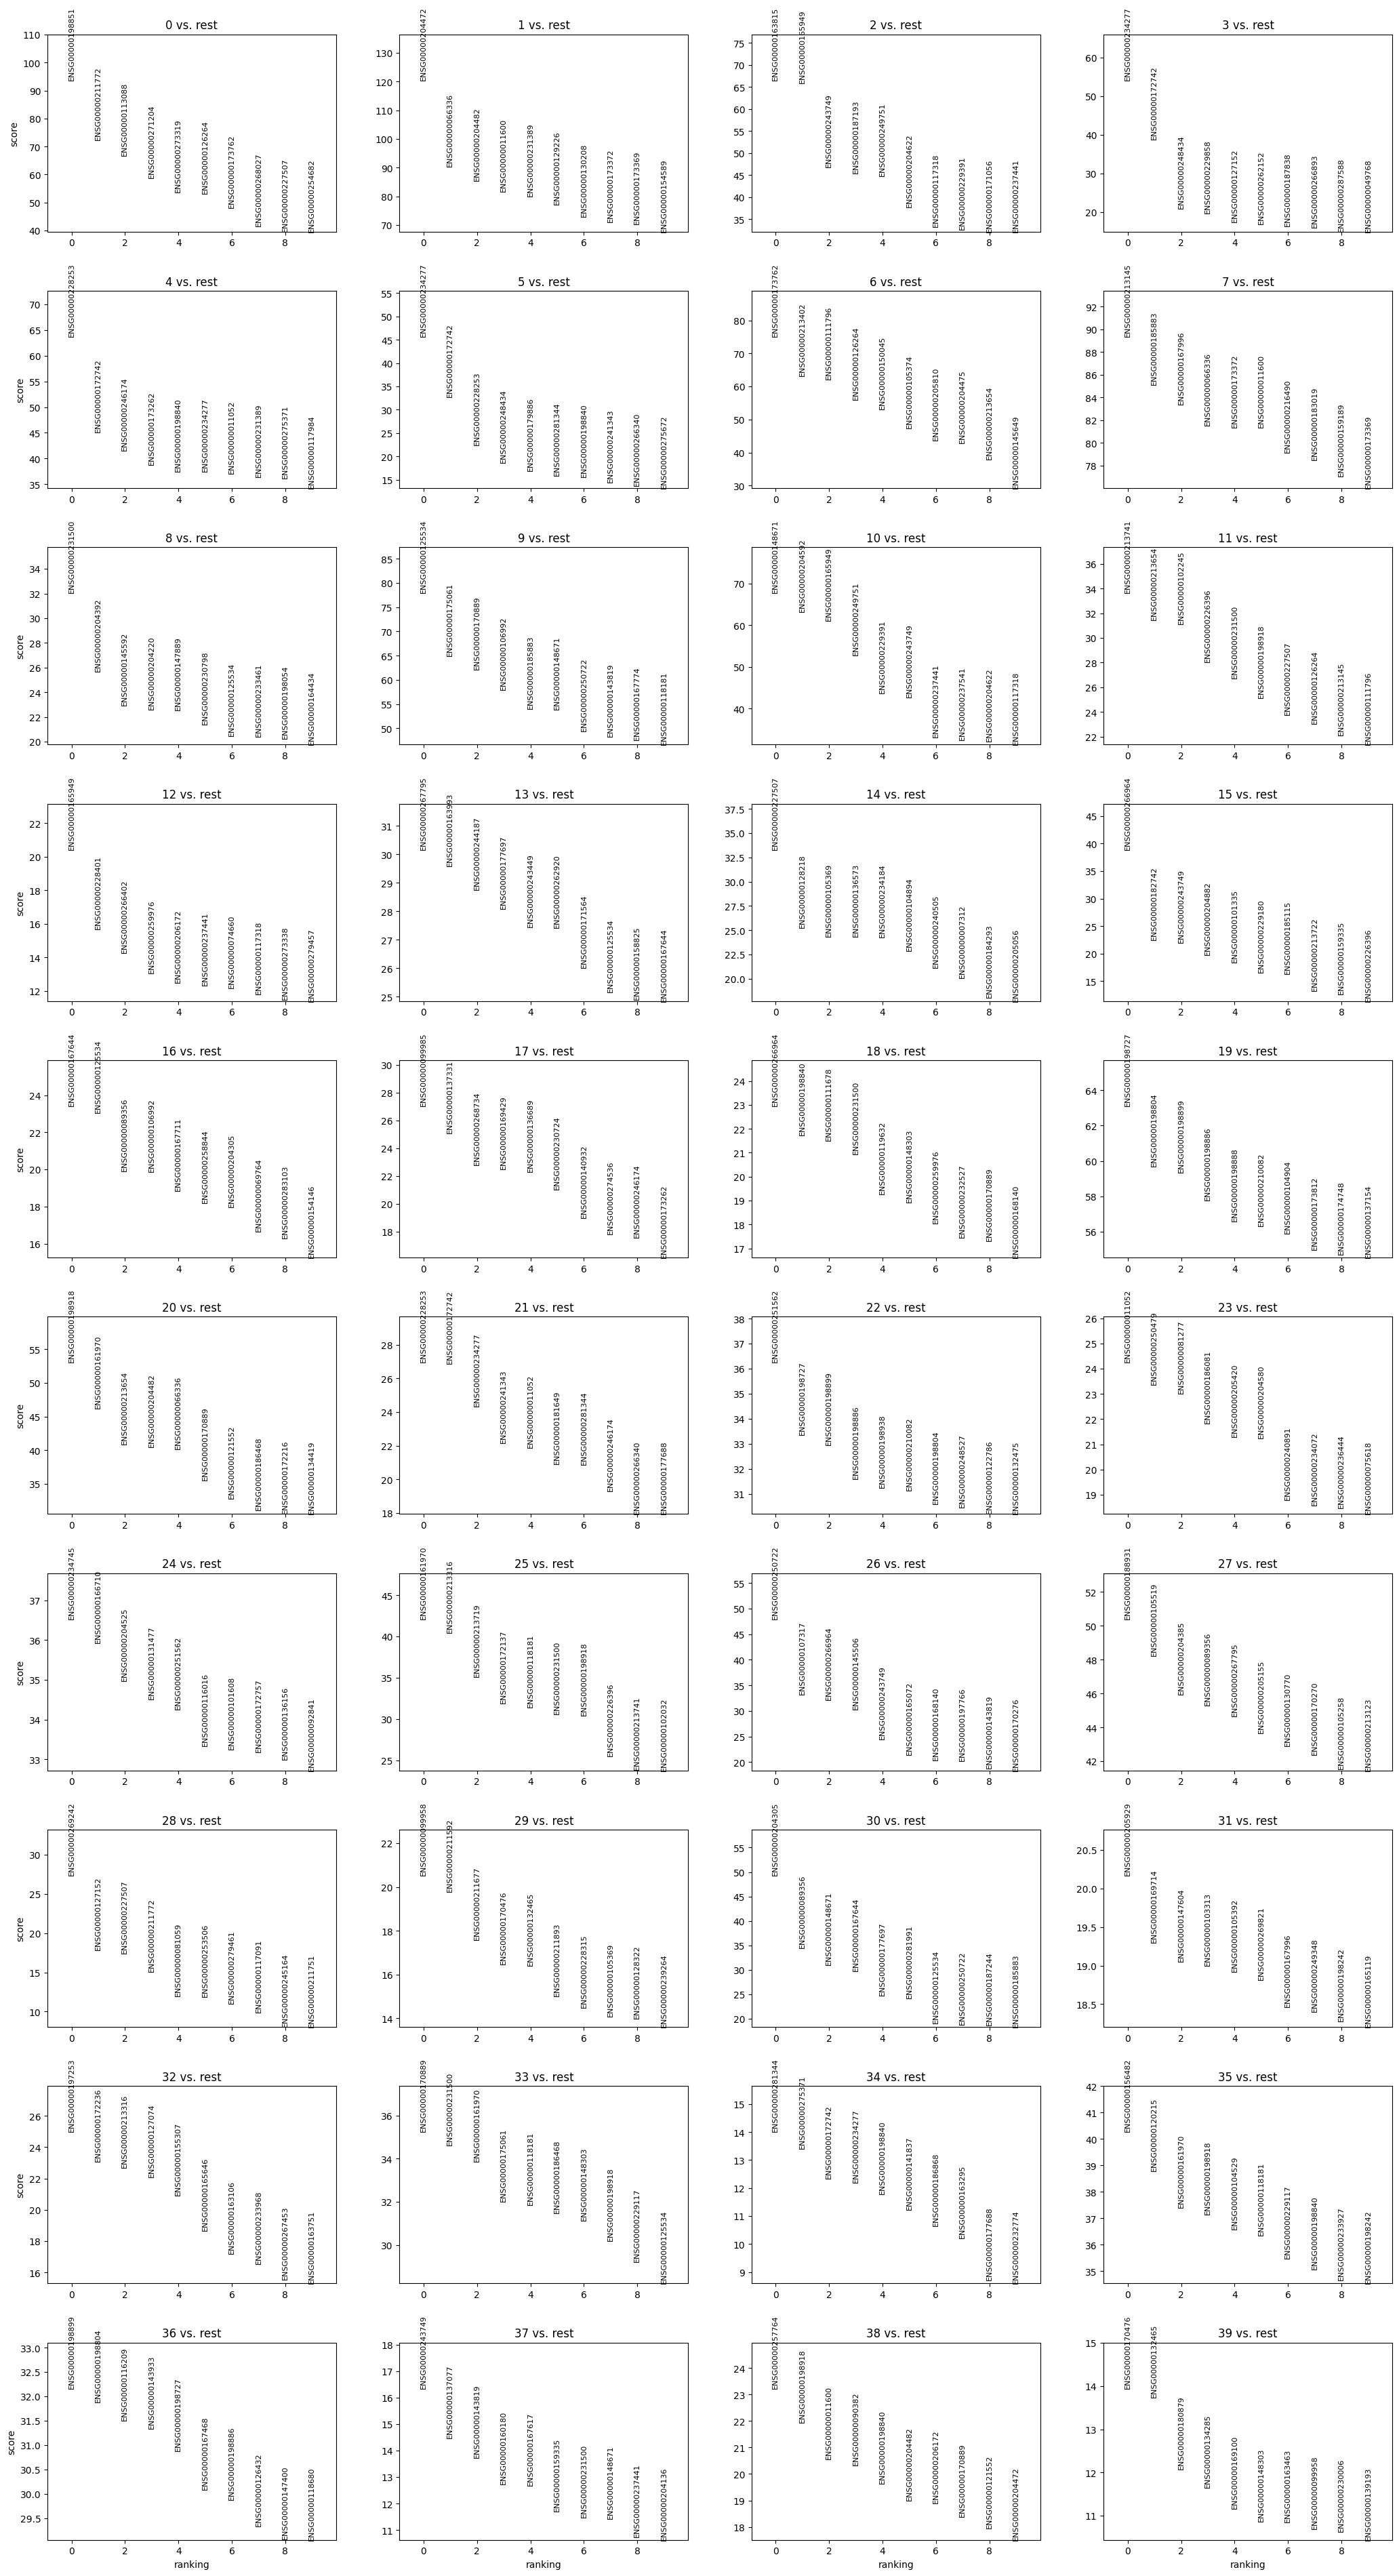

In [24]:
sc.tl.rank_genes_groups(adata_ref, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata_ref, n_genes=10, sharey=False)

/home/agathes/py_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:458: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/agathes/py_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:459: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/agathes/py_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/agathes/py_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:458: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/agathes/py_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:459: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/agathes/py_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_

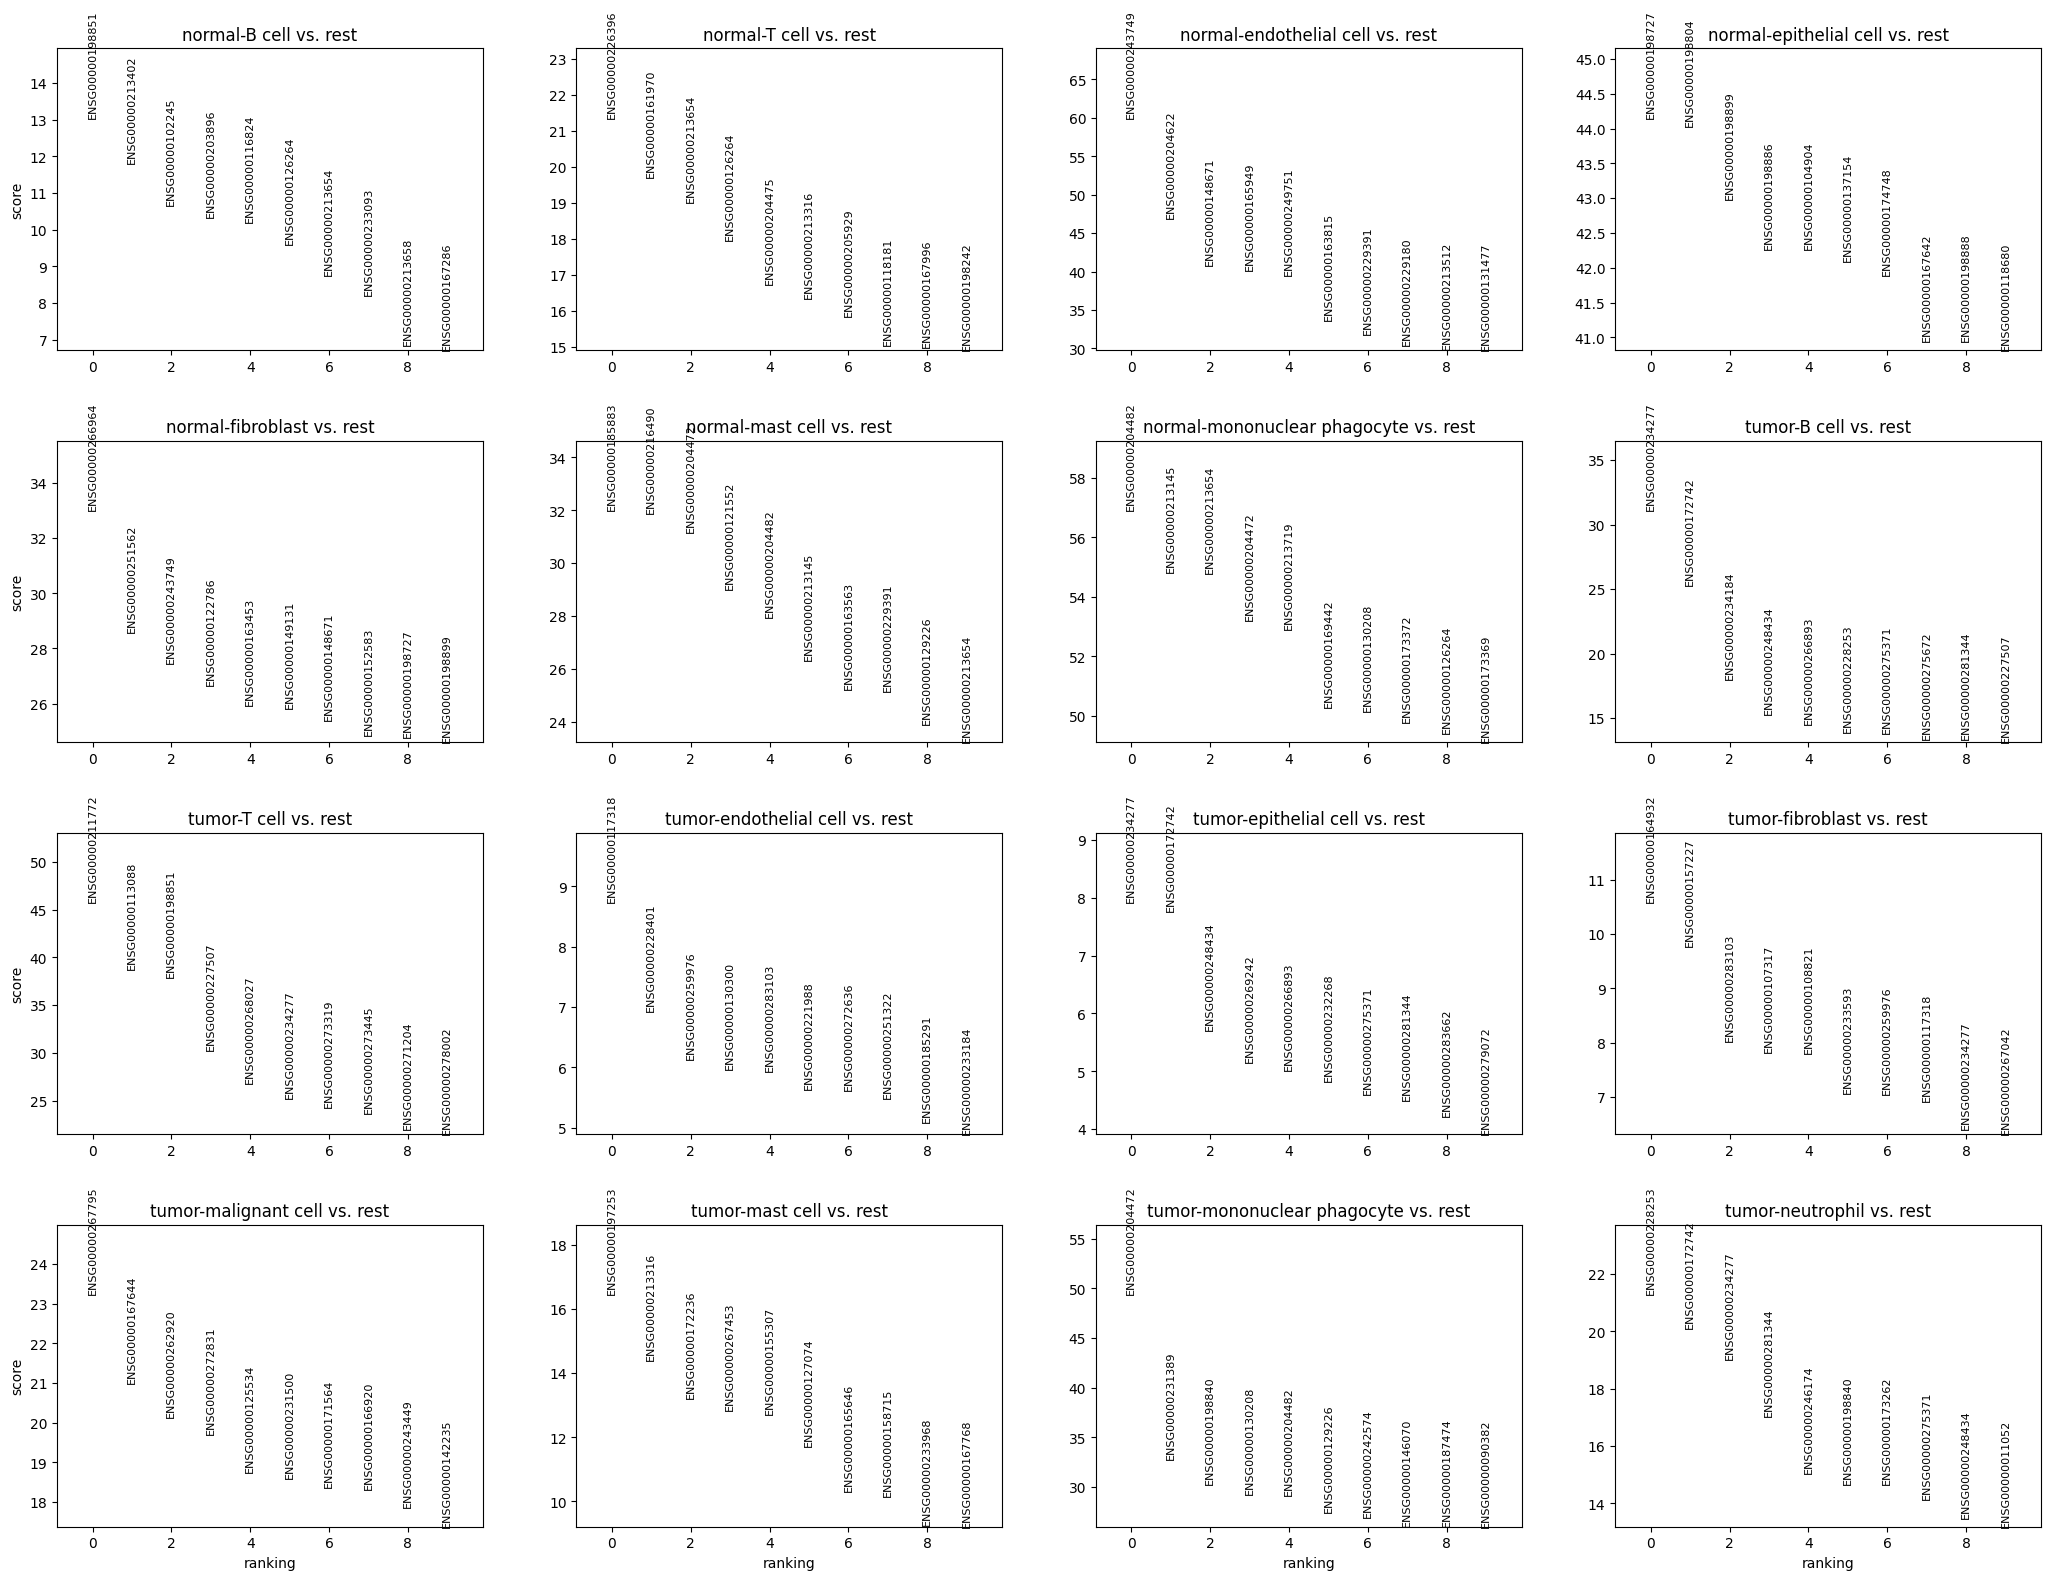

In [25]:
sc.tl.rank_genes_groups(adata_ref, 'sample_cell_type', method='t-test')
sc.pl.rank_genes_groups(adata_ref, n_genes=10, sharey=False)